# Milestone 2 - Phase 1
Muhammad Ikhsan Rahman Hakim - FTDS001

## League Of Legends High elo Ranked Games(2020)
*Classification High elo (Challenger) Ranked Games Results*

##### Introduction
League of Legends is a MOBA (multiplayer online battle arena) where 2 teams (blue and red) face off. There are 3 lanes, a jungle, and 5 roles. The goal is to take down the enemy Nexus to win the game. This dataset include Blue team, Red team information from Challenger ranked games.

##### Contents
This data contains key information that can affect the win or loss in the game. Each game is unique. The gameId can help you to fetch more attributes from the Riot API. The heart of the data is the result of the match between the blue and red teams.

#### Glossary
- Ward: An item that a player can put on the map to reveal the nearby area. Very useful for map/objectives control.
- Gold : Money to buy items
- Inhibitors : You can summon our team's superminions(very very powerful) by breaking the suppressor.
- Minions: NPC that belong to both teams. They give gold when killed by players.
- Jungle minions: NPC that belong to NO TEAM. They give gold and buffs when killed by players.
- Dragons: Elite monster which gives team bonus when killed. The 4th dragon killed by a team gives a massive stats bonus. The 5th dragon (Elder Dragon) offers a huge advantage to the team.
- Barons: Elite monster which gives team strong buff to empower minions for pushing lane.
- Towers: Structures you have to destroy to reach the enemy Nexus. They give gold.
- Level: Champion level. Start at 1. Max is 18.

https://www.kaggle.com/gyejr95/league-of-legends-challenger-ranked-games2020

**The column blueWins is the target value (the value we are trying to predict). A value of 1 means the blue team has won. 0 otherwise.**

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time

# Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Model evaluation
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import f1_score, roc_curve, auc, classification_report, accuracy_score, roc_auc_score, confusion_matrix
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

# Data Loading

In [4]:
# we can see all the columns
pd.set_option('display.max_columns', 100)

# to make this notebook's output stable across runs
np.random.seed(42)

In [5]:
rawdf = pd.read_csv('Challenger_Ranked_Games.csv')

# Dataset Exploration

In [6]:
rawdf.shape

(26904, 50)

In [7]:
rawdf.head(10)

,gameId,gameDuraton,blueWins,blueFirstBlood,blueFirstTower,blueFirstBaron,blueFirstDragon,blueFirstInhibitor,blueDragonKills,blueBaronKills,blueTowerKills,blueInhibitorKills,blueWardPlaced,blueWardkills,blueKills,blueDeath,blueAssist,blueChampionDamageDealt,blueTotalGold,blueTotalMinionKills,blueTotalLevel,blueAvgLevel,blueJungleMinionKills,blueKillingSpree,blueTotalHeal,blueObjectDamageDealt,redWins,redFirstBlood,redFirstTower,redFirstBaron,redFirstDragon,redFirstInhibitor,redDragonKills,redBaronKills,redTowerKills,redInhibitorKills,redWardPlaced,redWardkills,redKills,redDeath,redAssist,redChampionDamageDealt,redTotalGold,redTotalMinionKills,redTotalLevel,redAvgLevel,redJungleMinionKills,redKillingSpree,redTotalHeal,redObjectDamageDealt
0,4247263043,1323,0,1,0,0,0,0,0,0,0,0,38,13,15,31,22,56039,37001,440,56,11.2,105,4,31035,5675,1,0,1,0,1,1,3,0,9,1,50,17,31,15,68,73016,49832,533,64,12.8,138,8,38711,60463
1,4247155821,1317,1,0,0,0,1,0,2,0,4,0,57,18,19,8,31,60243,41072,531,63,12.6,111,3,26397,45303,0,1,1,0,0,0,0,0,2,0,46,18,8,19,8,44218,37136,571,59,11.8,134,3,24829,14105
2,4243963257,932,0,0,0,0,0,0,0,0,0,0,28,7,5,20,8,24014,22929,306,42,8.4,64,0,6567,5651,1,1,1,0,1,1,2,0,5,1,40,9,20,5,20,30797,35364,400,50,10.0,89,5,12589,45201
3,4241678498,2098,0,0,0,1,1,0,1,1,2,0,129,39,26,36,45,101607,63447,774,80,16.0,226,3,24718,31019,1,1,1,0,0,0,3,1,6,0,96,56,36,26,72,125866,70528,832,84,16.8,205,9,65312,88202
4,4241538868,2344,1,1,1,1,1,1,2,2,11,3,114,35,27,40,47,134826,74955,831,83,16.6,252,5,37161,95287,0,0,0,0,0,0,3,1,6,1,100,43,40,27,83,131536,74596,794,85,17.0,227,7,86431,64141
5,4241394461,1567,1,1,1,0,0,1,2,0,8,1,65,23,26,18,43,59839,52221,576,66,13.2,171,9,40925,51855,0,0,0,0,1,0,1,0,2,0,58,18,18,26,34,64242,44280,555,61,12.2,140,3,23741,20132
6,4233222221,1686,0,0,1,0,0,0,0,0,2,0,72,26,16,31,30,70270,47107,601,65,13.0,136,5,20503,31788,1,1,0,1,1,1,4,1,7,1,72,29,31,16,59,78424,58032,640,73,14.6,214,5,31415,61040
7,4233113995,1588,1,1,1,1,0,1,2,1,10,2,79,39,36,20,88,102449,59163,613,71,14.2,157,7,28612,67404,0,0,0,0,1,0,2,0,1,0,76,28,20,36,30,62134,47408,608,63,12.6,133,5,27846,32107
8,4231100932,1618,1,1,1,1,0,1,3,1,8,1,89,57,26,25,44,77245,57940,704,71,14.2,144,5,29726,66468,0,0,0,0,1,0,1,0,2,0,96,33,25,26,34,69840,49906,646,69,13.8,159,6,32026,41601
9,4229230455,1126,1,0,1,0,1,0,1,0,4,0,43,20,20,11,34,56652,39014,486,57,11.4,115,5,17630,37483,0,1,0,0,0,0,0,0,1,0,47,19,11,20,13,32999,32064,461,53,10.6,92,3,23511,10775


In [8]:
rawdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26904 entries, 0 to 26903
Data columns (total 50 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   gameId                   26904 non-null  int64  
 1   gameDuraton              26904 non-null  int64  
 2   blueWins                 26904 non-null  int64  
 3   blueFirstBlood           26904 non-null  int64  
 4   blueFirstTower           26904 non-null  int64  
 5   blueFirstBaron           26904 non-null  int64  
 6   blueFirstDragon          26904 non-null  int64  
 7   blueFirstInhibitor       26904 non-null  int64  
 8   blueDragonKills          26904 non-null  int64  
 9   blueBaronKills           26904 non-null  int64  
 10  blueTowerKills           26904 non-null  int64  
 11  blueInhibitorKills       26904 non-null  int64  
 12  blueWardPlaced           26904 non-null  int64  
 13  blueWardkills            26904 non-null  int64  
 14  blueKills             

In [9]:
rawdf.describe().T

,count,mean,std,min,25%,50%,75%,max
gameId,26904.0,4.171927e+09,7.479506e+07,3.482433e+09,4.142427e+09,4.190657e+09,4.219650e+09,4.261026e+09
gameDuraton,26904.0,1.448654e+03,4.225773e+02,1.900000e+02,1.152000e+03,1.435000e+03,1.738000e+03,3.301000e+03
blueWins,26904.0,5.000743e-01,5.000093e-01,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
blueFirstBlood,26904.0,5.035311e-01,4.999968e-01,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
blueFirstTower,26904.0,5.256096e-01,4.993530e-01,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
blueFirstBaron,26904.0,2.440901e-01,4.295544e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
blueFirstDragon,26904.0,4.063336e-01,4.911574e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
blueFirstInhibitor,26904.0,3.671201e-01,4.820286e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
blueDragonKills,26904.0,1.389719e+00,1.247393e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00,7.000000e+00
blueBaronKills,26904.0,3.070175e-01,5.371399e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,4.000000e+00


# Data Cleaning
### Missing values

In [10]:
rawdf.isnull().sum().any()

False

### Duplicated Rows

In [11]:
print(f"Is there any duplicated rows? \n{rawdf.duplicated().any()}")
print(f"\nHow many? \n{rawdf.duplicated().sum()} rows")

Is there any duplicated rows? 
True

How many? 
56 rows


In [12]:
# drop duplicated rows
newdf = rawdf.drop_duplicates()

In [13]:
newdf.duplicated().any()

False

In [14]:
newdf = newdf.rename(columns = {"gameDuraton": "gameDuration"})

# Data Exploration (EDA)

In [15]:
# set plot style for EDA
plt.style.use('fivethirtyeight')

#### Both team win percentage

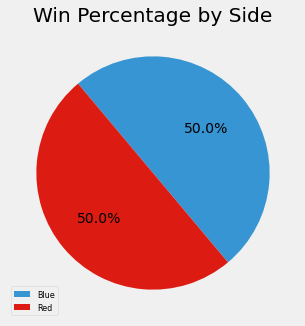

In [16]:
plt.figure(figsize = (5,5))
labels = ['Blue', 'Red']
sizes = [newdf['blueWins'].mean(), newdf['redWins'].mean()]
colors = ['#3895D3', '#DC1C13']

plt.pie(sizes, autopct='%1.1f%%', colors=colors, startangle=310)
plt.title("Win Percentage by Side")
plt.legend(labels=labels, loc=3,prop={'size': 8})
plt.show()

Kedua sisi memiliki jumlah rata-rata persentasi kemenangan yang sama.

#### Average game length

Average game length: 24.14 minutes


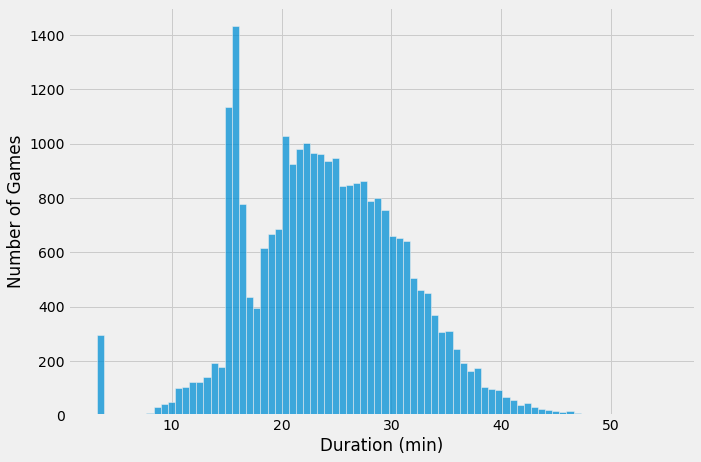

In [17]:
print("Average game length: {:.2f} minutes".format(newdf['gameDuration'].mean()/60))

plt.figure(figsize=(10,7))
sns.histplot(newdf['gameDuration']/60)
plt.xlabel('Duration (min)')
plt.ylabel('Number of Games')
plt.show()

Berdasarkan perhitungan statistik, rata-rata waktu permainan adalah 24 menit. Namun jika dilihat dari plot, ada juga sesi permainan yang hanya berlangsung sekitar 15-18 menit. Hal ini lumrah terjadi pada permainan "Ranked High Elo", biasanya salah satu tim lebih kompak dan unggul dibandingkan tim lawannya. Sementara ada juga beberapa permainan yang hanya selesai dalam waktu kurang lebih 4 menit, hal ini terjadi karena dalam sesi permainan tersebut ada player yang disconnect dan tak kunjung kembali sehingga salah satu tim mengajukan "remake" dan otomatis permainan selesai saat itu juga.

#### Winning Correlation

In [18]:
blue_corr = newdf.corr()['blueWins'].sort_values(axis=0, ascending=False) 
red_corr = newdf.corr()['redWins'].sort_values(axis=0, ascending=False) 

blue_corr

blueWins                   1.000000
blueTowerKills             0.708691
blueFirstInhibitor         0.637586
blueInhibitorKills         0.554389
blueObjectDamageDealt      0.525518
blueDragonKills            0.466738
blueKills                  0.453907
redDeath                   0.451919
blueFirstTower             0.449352
blueKillingSpree           0.420988
blueAssist                 0.373654
blueFirstBaron             0.367137
blueBaronKills             0.355501
blueTotalGold              0.276592
blueFirstDragon            0.267680
blueTotalLevel             0.226308
blueAvgLevel               0.226308
blueTotalHeal              0.215617
blueJungleMinionKills      0.208066
blueFirstBlood             0.206651
blueChampionDamageDealt    0.180202
blueTotalMinionKills       0.079149
blueWardkills              0.070724
blueWardPlaced             0.037754
gameDuration              -0.001372
gameId                    -0.005338
redWardPlaced             -0.050021
redTotalMinionKills       -0

<AxesSubplot:>

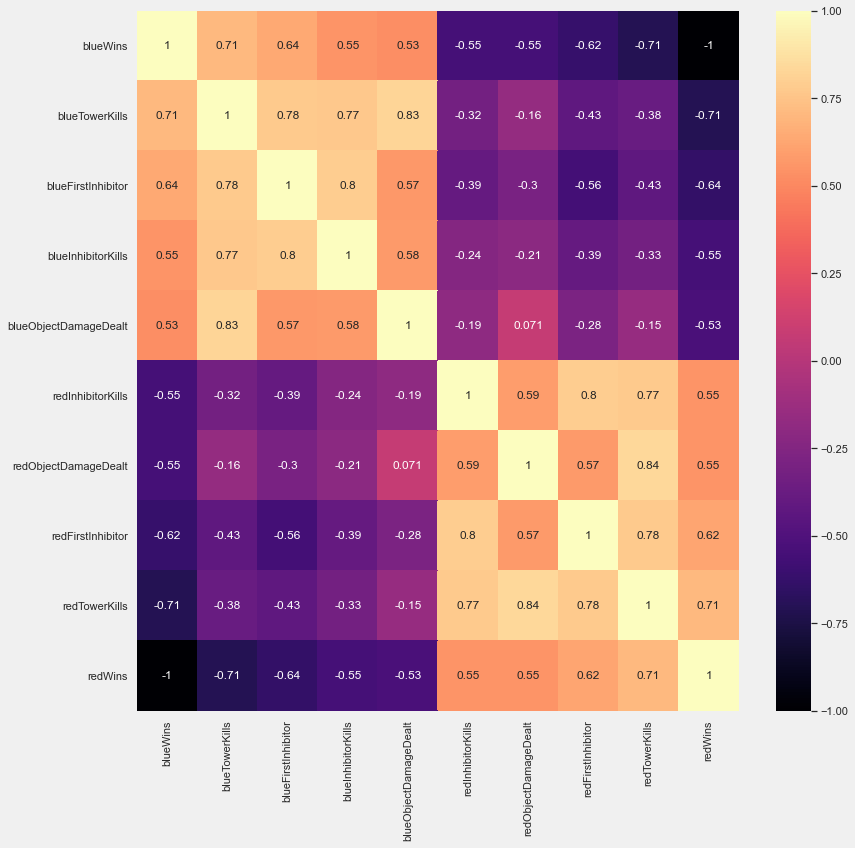

In [19]:
# get correlations of 0.5 or more
corr_cols = [item for item,corr in blue_corr.iteritems() if abs(corr)>0.5]
plt.figure(figsize=(12,12))
sns.set(font_scale = 1)
sns.heatmap(newdf[corr_cols].corr(), cmap='magma', annot=True)

Plot heatmap korelasi matrix disini menunjukkan beberapa kolom yang berpengaruh terhadap kemenangan/kekalahan tim biru dan merah (nilai korelasi >0.5 antara kolom-kolom lain terhadap kolom "blueWins" dan "redWins").

Semakin mendekati angka 1, maka kolom tersebut semakin berkorelasi satu sama lain dan berpengaruh terhadapnya. Contoh kolom "blueTowerKills" memiliki nilai 0.71 terhadap kolom "blueWins" selain berarti kedua kolom ini berkorelasi satu sama lain, kolom "blueTowerKills" memiliki peran yang cukup tinggi dalam kemenangan tim biru (tentu saja, semakin banyak tower yang dihancurkan tim biru semakin tinggi kemungkinan untuk menang). Dan jika dilihat korelasi dengan kolom "redTowerKills" dengan nilai -0.71 artinya ini berbanding terbalik, tim biru semakin kecil kemungkinannya untuk menang.

Namun 5 kolom ini dirasa tidak cukup untuk menggambarkan bagaimana sebuah tim dapat menang. Karena tentu saja menghancurkan tower -> pushing lane -> base musuh hancur -> menang. Kita perlu melihat variabel lainnya, walaupun memiliki nilai korelasi yang lebih rendah bisa saja kita mendapatkan insight baru dari mereka.

Dari pengalaman saya bermain game ini, ada beberapa variabel yang memiliki impact juga, antara lain:
- First Tower = Mendapatkan gold lebih untuk player dan tim
- First Blood = Mendapatkan gold lebih dan meningkatkan moral tim
- Dragon/Baron Kills = Objective tambahan untuk mendapatkan buff, gold dan exp
- Ward kills/placed = Untuk map vision dan mencegah ambush
- Total Gold = semakin banyak gold, semakin bagus item

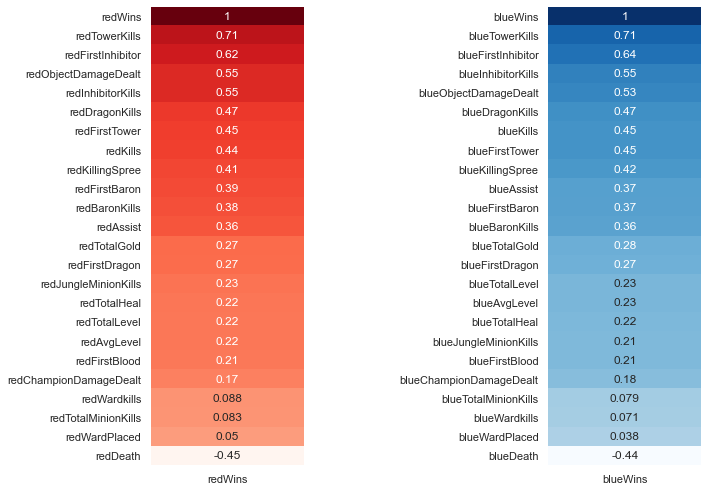

<Figure size 144x504 with 0 Axes>

<Figure size 144x504 with 0 Axes>

In [20]:
fig, ax = plt.subplots(1, 2, figsize=(10, 7))

plt.figure(figsize=(2,7))
red_team = [item for item,corr in blue_corr.iteritems() if 'red' in item]
sns.heatmap(red_corr[red_team].sort_values(axis=0, ascending=False).to_frame(), annot=True, cbar=False, ax=ax[0], cmap='Reds')

plt.figure(figsize=(2,7))
blue_team = [item for item,corr in blue_corr.iteritems() if 'blue' in item]
sns.heatmap(blue_corr[blue_team].to_frame(), annot=True, cbar=False, ax=ax[1], cmap='Blues')

fig.tight_layout(w_pad=8)

plt.show()

Proporsi keduanya terlihat cukup seimbang. Entah kita ada di tim merah atau biru, keduanya memiliki porsi yang sama. Dan seperti objektif dasar permainan ini "Hancurkan base musuh = menang" terlihat dari 4 kolom teratas tentang menghancurkan object base musuh.

Dari segi permainan, awalnya saya mengira "Warding" (penempatan ward) atau menghancurkan ward musuh akan menjadi salah satu kunci utama untuk memenangkan permainan, dengan vision yang baik pada map kita dapat mengetahui pergerakan lawan dan mencegah ambush musuh. Namun berdasarkan perhitungan disini warding bukan menjadi variabel kemenangan suatu tim. Selain itu mengamankan area Dragon lebih menguntungkan untuk tim dibandingkan dengan area Baron. Padahal dari segi buff, exp dan gold yang didapatkan lebih besar Baron daripada Dragon. Tim yang berhasil mendapatkan tower pertama berkemungkinan besar akan menang daripada jumlah total kill yang didapatkan. 

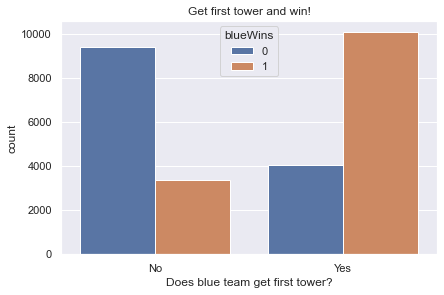

In [21]:
sns.countplot(x=newdf['blueFirstTower'], hue=newdf['blueWins'], data=newdf)

positions = (0,1)
labels = ('No','Yes')
plt.title('Get first tower and win!')
plt.xticks(positions,labels)
plt.xlabel('Does blue team get first tower?')
plt.show()

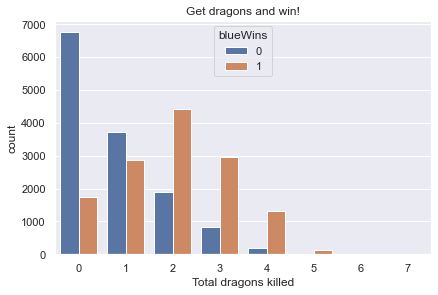

In [22]:
sns.countplot(x=newdf['blueDragonKills'], hue=newdf['blueWins'], data=newdf)
plt.title('Get dragons and win!')
plt.xlabel('Total dragons killed')
plt.show()

----

Pada dataset ini saya akan berfokus pada kemenangan Tim Biru, jadi saya akan drop semua kolom Tim Merah.

In [23]:
newdf =  newdf.drop(list(newdf.filter(regex='red')), axis=1)
newdf.head(5)

,gameId,gameDuration,blueWins,blueFirstBlood,blueFirstTower,blueFirstBaron,blueFirstDragon,blueFirstInhibitor,blueDragonKills,blueBaronKills,blueTowerKills,blueInhibitorKills,blueWardPlaced,blueWardkills,blueKills,blueDeath,blueAssist,blueChampionDamageDealt,blueTotalGold,blueTotalMinionKills,blueTotalLevel,blueAvgLevel,blueJungleMinionKills,blueKillingSpree,blueTotalHeal,blueObjectDamageDealt
0,4247263043,1323,0,1,0,0,0,0,0,0,0,0,38,13,15,31,22,56039,37001,440,56,11.2,105,4,31035,5675
1,4247155821,1317,1,0,0,0,1,0,2,0,4,0,57,18,19,8,31,60243,41072,531,63,12.6,111,3,26397,45303
2,4243963257,932,0,0,0,0,0,0,0,0,0,0,28,7,5,20,8,24014,22929,306,42,8.4,64,0,6567,5651
3,4241678498,2098,0,0,0,1,1,0,1,1,2,0,129,39,26,36,45,101607,63447,774,80,16.0,226,3,24718,31019
4,4241538868,2344,1,1,1,1,1,1,2,2,11,3,114,35,27,40,47,134826,74955,831,83,16.6,252,5,37161,95287


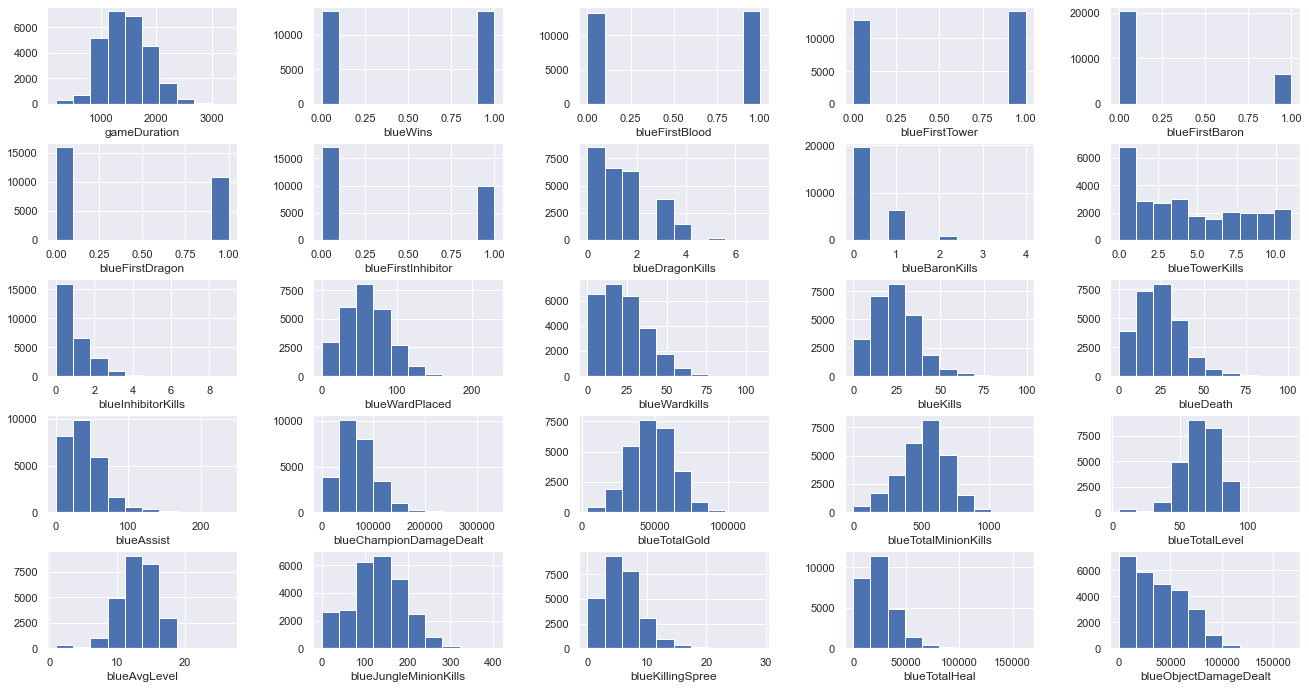

In [24]:
fig = plt.figure(figsize=(20, 18))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(1, len(newdf.columns)):
    ax = fig.add_subplot(8, 5, i)
    ax.hist(newdf[newdf.columns[i]])
    #sns.histplot(newdf[newdf.columns[i]])
    plt.xlabel(newdf.columns[i])

Sebagian besar data terdistribusi normal, walaupun ada beberapa data yang skewed.

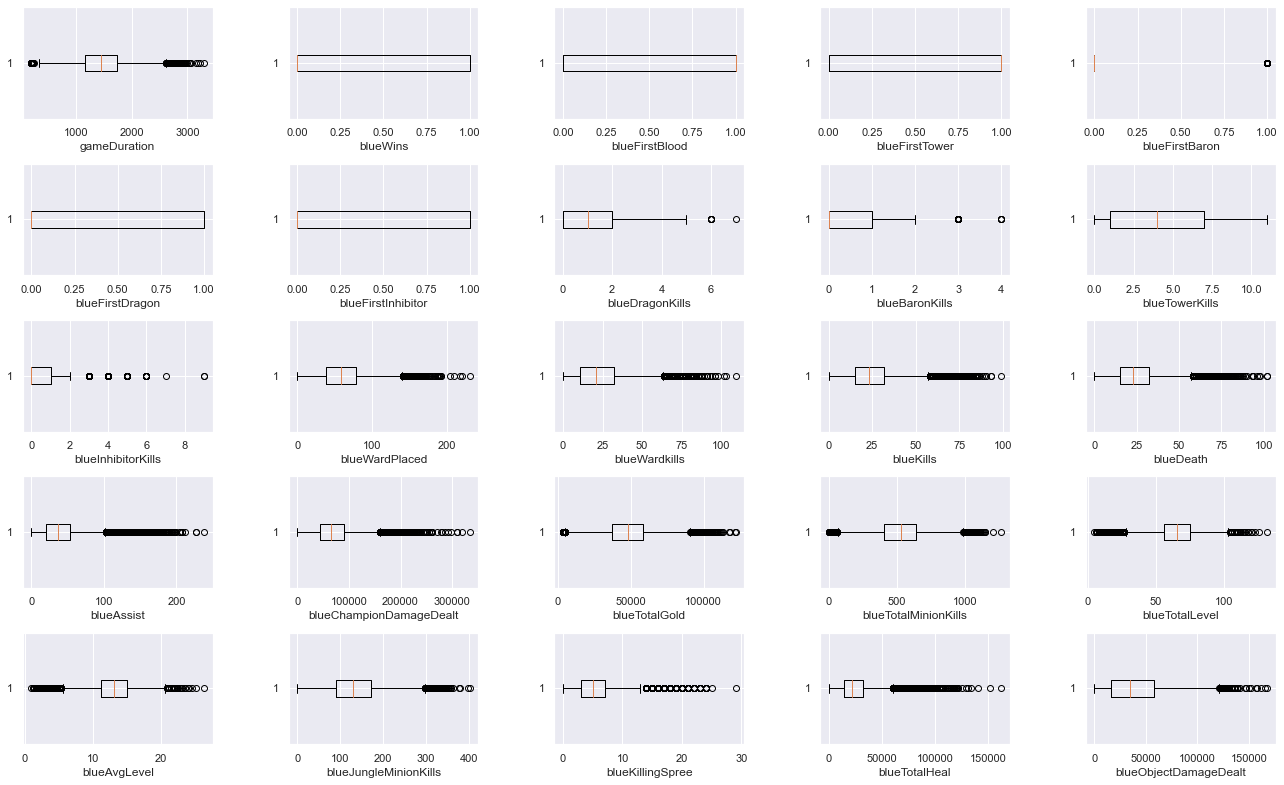

In [25]:
fig = plt.figure(figsize=(20, 18))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(1, len(newdf.columns)):
    ax = fig.add_subplot(7, 5, i)
    ax.boxplot(newdf[newdf.columns[i]], vert=False)
    plt.xlabel(newdf.columns[i])

Hasil boxplot menunjukkan ada kolom-kolom yang memiliki outlier.

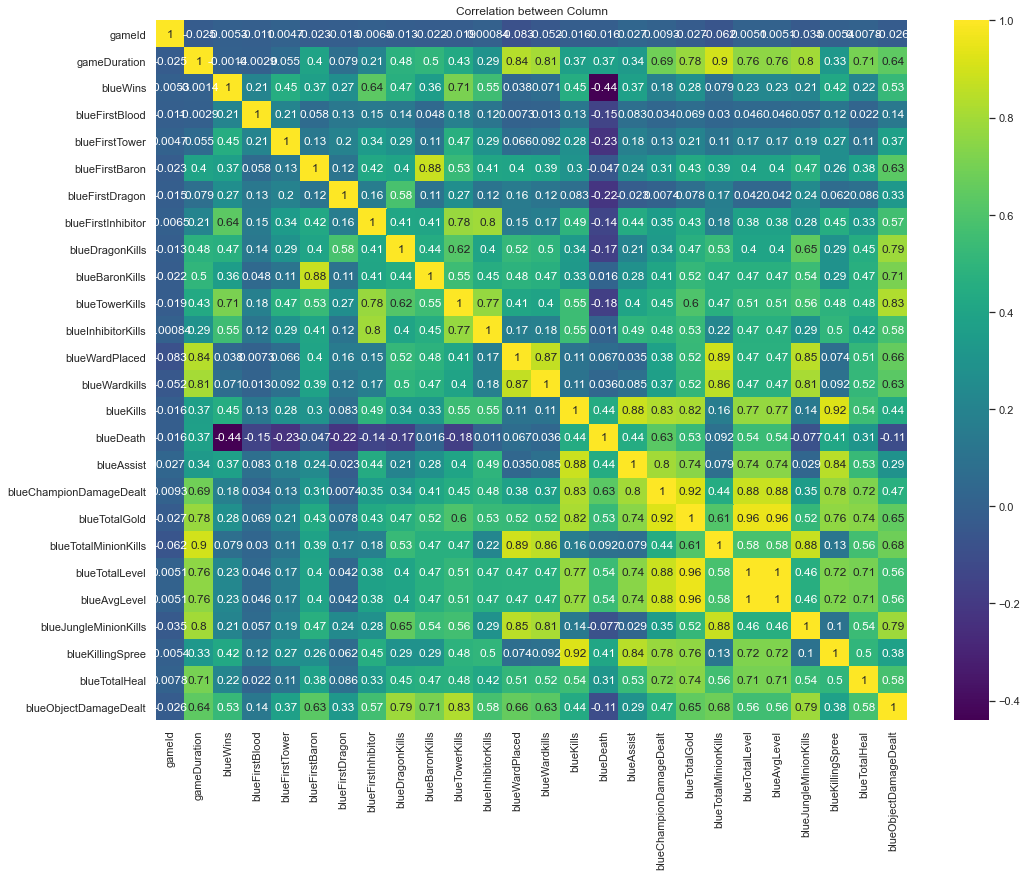

In [26]:
all_corr = newdf.corr()

plt.figure(figsize = (15, 12))
sns.heatmap(all_corr, cmap='viridis', annot=True)
            
plt.title("Correlation between Column")
plt.show()

Dari hasil korelasi matrix secara keseluruhan, saya akan mengambil features dari kolom yang memiliki nilai korelasi yang kecil. Kolom-kolom tersebut adalah:
- gameDuration
- blueFirstBlood
- blueFirstTower
- blueFirstBaron
- blueFirstDragon
- blueFirstInhibitor
- blueDragonKills
- blueBaronKills

# Data Preprocessing
## Outlier

In [27]:
irq_score = {}
cols = list(newdf.columns)

for c in cols:
    q1 = newdf[c].quantile(0.25)
    q3 = newdf[c].quantile(0.75)
    score = q3 - q1
    outliers = newdf[(newdf[c] < q1 - 1.5 * score) | (newdf[c] > q3 + 1.5 * score)][c]
    values = newdf[(newdf[c] >= q1 - 1.5 * score) | (newdf[c] <= q3 + 1.5 * score)][c]
    
    irq_score[c] = {
    
        "IQR": score,
        "n_outliers": outliers.count(),
        "outliers_avg": outliers.mean(),
        "outliers_stdev": outliers.std(),
        "outliers_median": outliers.median(),
        "values_avg:": values.mean(),
        "values_stdev": values.std(),
        "values_median": values.median(),
    }
    
irq_score = pd.DataFrame.from_dict(irq_score, orient='index')

irq_score

,IQR,n_outliers,outliers_avg,outliers_stdev,outliers_median,values_avg:,values_stdev,values_median
gameId,77257589.00,1034,3.926999e+09,1.285828e+08,3.974669e+09,4.171908e+09,7.484765e+07,4.190650e+09
gameDuration,585.25,400,8.703550e+02,1.136359e+03,1.950000e+02,1.448641e+03,4.225805e+02,1.435000e+03
blueWins,1.00,0,NaN,NaN,NaN,4.999628e-01,5.000093e-01,0.000000e+00
blueFirstBlood,1.00,0,NaN,NaN,NaN,5.035384e-01,4.999968e-01,1.000000e+00
blueFirstTower,1.00,0,NaN,NaN,NaN,5.258120e-01,4.993426e-01,1.000000e+00
blueFirstBaron,0.00,6551,1.000000e+00,0.000000e+00,1.000000e+00,2.440033e-01,4.295027e-01,0.000000e+00
blueFirstDragon,1.00,0,NaN,NaN,NaN,4.063990e-01,4.911699e-01,0.000000e+00
blueFirstInhibitor,1.00,0,NaN,NaN,NaN,3.670292e-01,4.820035e-01,0.000000e+00
blueDragonKills,2.00,6,6.166667e+00,4.082483e-01,6.000000e+00,1.389973e+00,1.247234e+00,1.000000e+00
blueBaronKills,1.00,54,3.074074e+00,2.643505e-01,3.000000e+00,3.069875e-01,5.371376e-01,0.000000e+00


Outlier yang terdeteksi akan di drop agar prediksi model lebih optimal. Kolom gameId, gameDuration dan blueDeath akan di drop nantinya jadi outlier akan dibiarkan saja untuk kedua kolom ini.

In [28]:
newdf = newdf.drop(columns = ['gameId', 'blueDeath'])
newdf.head()

,gameDuration,blueWins,blueFirstBlood,blueFirstTower,blueFirstBaron,blueFirstDragon,blueFirstInhibitor,blueDragonKills,blueBaronKills,blueTowerKills,blueInhibitorKills,blueWardPlaced,blueWardkills,blueKills,blueAssist,blueChampionDamageDealt,blueTotalGold,blueTotalMinionKills,blueTotalLevel,blueAvgLevel,blueJungleMinionKills,blueKillingSpree,blueTotalHeal,blueObjectDamageDealt
0,1323,0,1,0,0,0,0,0,0,0,0,38,13,15,22,56039,37001,440,56,11.2,105,4,31035,5675
1,1317,1,0,0,0,1,0,2,0,4,0,57,18,19,31,60243,41072,531,63,12.6,111,3,26397,45303
2,932,0,0,0,0,0,0,0,0,0,0,28,7,5,8,24014,22929,306,42,8.4,64,0,6567,5651
3,2098,0,0,0,1,1,0,1,1,2,0,129,39,26,45,101607,63447,774,80,16.0,226,3,24718,31019
4,2344,1,1,1,1,1,1,2,2,11,3,114,35,27,47,134826,74955,831,83,16.6,252,5,37161,95287


In [29]:
max_blueKills = newdf["blueKills"].quantile(0.75)
min_blueKills = newdf["blueKills"].quantile(0.25)

new_df = newdf[(newdf["blueKills"] < max_blueKills) & (newdf["blueKills"] > min_blueKills)]

Namun tidak semua outlier bisa saya drop karena akan mengurangi banyak rows dari dataset. Sehingga saya hanya akan menghapus outlier di kolom blueKills dengan asumsi jumlah kill diatas Q3(75%) adalah *very late game* atau game dengan durasi diatas 35 menit. untuk ukuran Pro Player ini adalah durasi permainan yang terlalu lama.

In [30]:
new_df.shape

(12796, 24)

## Feature Selection

In [31]:
new_df = new_df.drop(list(new_df)[9:], axis=1)
new_df.head()

,gameDuration,blueWins,blueFirstBlood,blueFirstTower,blueFirstBaron,blueFirstDragon,blueFirstInhibitor,blueDragonKills,blueBaronKills
1,1317,1,0,0,0,1,0,2,0
3,2098,0,0,0,1,1,0,1,1
4,2344,1,1,1,1,1,1,2,2
5,1567,1,1,1,0,0,1,2,0
6,1686,0,0,1,0,0,0,0,0


## Split dataset to features (X) dan target (y)

In [32]:
X = new_df.drop(columns = ["blueWins"])
y = new_df["blueWins"]

## Split Dataset

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

## Scalling

In [34]:
scaler = MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler()

In [35]:
X_train_trf = scaler.transform(X_train)
X_test_trf = scaler.transform(X_test)

# Define Model, Training, Improvement (with best params) and Evaluation 

## Without pipeline

In [36]:
# Evaluate function

def evaluate(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    print("TRAINING RESULTS: \n===============================")
    model_report = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_train, y_train_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_train, y_train_pred):.4f}")
    print(f"F1 SCORE:\n{f1_score(y_train, y_train_pred)}")
    print(f"ROC_AUC SCORE:\n{roc_auc_score(y_train, y_train_pred)}\n")
    print(f"CLASSIFICATION REPORT:\n{model_report}\n")

    print("TESTING RESULTS: \n===============================")
    model_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_test, y_test_pred):.4f}")
    print(f"F1 SCORE:\n{f1_score(y_test, y_test_pred)}")
    print(f"ROC_AUC SCORE:\n{roc_auc_score(y_test, y_test_pred)}\n")
    print(f"CLASSIFICATION REPORT:\n{model_report}")

### Logistic Regression

In [37]:
tstart = time.time() #for calculating processing time

C = [0.1, 0.5, 1]
solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
verbose = [1, 2, 3]

params_grid = {'C': C,
               'solver': solver,
               'verbose': verbose}

model_log = LogisticRegression(random_state=42)
model_log_gridCV = GridSearchCV(model_log, params_grid, cv=5, verbose=2, n_jobs=-1)

model_log_gridCV.fit(X_train_trf, y_train)
best_params = model_log_gridCV.best_params_
print(f"Best parameters: {best_params}")


tfinish = time.time()
time_elapsed = round((tfinish - tstart)*1000, 2)
print('Elapsed prediction time: ',time_elapsed,' ms')

model_log_best = LogisticRegression(**best_params)
model_log_best.fit(X_train_trf, y_train)

evaluate(model_log_best, X_train_trf, y_train, X_test_trf, y_test)

Fitting 5 folds for each of 45 candidates, totalling 225 fits
[LibLinear]Best parameters: {'C': 1, 'solver': 'liblinear', 'verbose': 1}
Elapsed prediction time:  5421.77  ms
[LibLinear]TRAINING RESULTS: 
CONFUSION MATRIX:
[[3366  434]
 [ 391 4766]]
ACCURACY SCORE:
0.9079
F1 SCORE:
0.9203437288790189
ROC_AUC SCORE:
0.9049850994560281

CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.895928     0.916538  0.907893     0.906233      0.907794
recall        0.885789     0.924181  0.907893     0.904985      0.907893
f1-score      0.890830     0.920344  0.907893     0.905587      0.907822
support    3800.000000  5157.000000  0.907893  8957.000000   8957.000000

TESTING RESULTS: 
CONFUSION MATRIX:
[[1429  184]
 [ 179 2047]]
ACCURACY SCORE:
0.9054
F1 SCORE:
0.9185550818936504
ROC_AUC SCORE:
0.9027567734974536

CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.888682     0.

### Random Forest

In [38]:
tstart = time.time() #for calculating processing time

n_estimators = [100, 200, 300]
max_features = ['auto', 'sqrt']
max_depth = [2, 3, 5]
criterion = ['gini','entropy']

params_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'criterion': criterion}

model_rf = RandomForestClassifier(random_state=42)
model_rf_gridCV = GridSearchCV(model_rf, params_grid, cv=5, verbose=2, n_jobs=-1)


model_rf_gridCV.fit(X_train_trf, y_train)
best_params = model_rf_gridCV.best_params_
print(f"Best parameters: {best_params}")

tfinish = time.time()
time_elapsed = round((tfinish - tstart)*1000, 2)
print('Elapsed prediction time: ',time_elapsed,' ms')

model_rf_best = RandomForestClassifier(**best_params)
model_rf_best.fit(X_train_trf, y_train)

evaluate(model_rf_best, X_train_trf, y_train, X_test_trf, y_test)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters: {'criterion': 'entropy', 'max_depth': 5, 'max_features': 'auto', 'n_estimators': 200}
Elapsed prediction time:  24165.19  ms
TRAINING RESULTS: 
CONFUSION MATRIX:
[[3410  390]
 [ 364 4793]]
ACCURACY SCORE:
0.9158
F1 SCORE:
0.9270793036750483
ROC_AUC SCORE:
0.9133923741873591

CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.903551     0.924754   0.91582     0.914152      0.915758
recall        0.897368     0.929416   0.91582     0.913392      0.915820
f1-score      0.900449     0.927079   0.91582     0.913764      0.915781
support    3800.000000  5157.000000   0.91582  8957.000000   8957.000000

TESTING RESULTS: 
CONFUSION MATRIX:
[[1434  179]
 [ 153 2073]]
ACCURACY SCORE:
0.9135
F1 SCORE:
0.9258597588209021
ROC_AUC SCORE:
0.910146752380841

CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision  

Dari hasil scoring kedua model, didapatkan model RandomForest yang paling cocok untuk dataset ini.

## Using Pipeline

In [39]:
pipe = Pipeline([('preprocessing', MinMaxScaler()), ('classifier', RandomForestClassifier(random_state=42))])

In [40]:
param_grid = [
    {'classifier': [RandomForestClassifier(random_state=42)],
     'preprocessing': [MinMaxScaler(), None],
     'classifier__n_estimators': [100, 200, 300],
     'classifier__criterion': ['entropy', 'gini'],
     'classifier__max_features': ['auto', 'sqrt'],
     'classifier__max_depth': [2, 3, 5]},
    {'classifier': [LogisticRegression(random_state=42)],
     'preprocessing': [MinMaxScaler(), None],
     'classifier__C': [0.1, 0.5, 1],
     'classifier__solver': ['newton-cg', 'lbfgs', 'liblinear'],
     'classifier__verbose': [1, 2, 3]}
]

In [41]:
grid = GridSearchCV(pipe, param_grid, cv=5, n_jobs=-1,verbose=2)
grid.fit(X_train, y_train)

print("Best params:\n{}\n".format(grid.best_params_))
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Test-set score: {:.2f}".format(grid.score(X_test, y_test)))

Fitting 5 folds for each of 126 candidates, totalling 630 fits
Best params:
{'classifier': RandomForestClassifier(criterion='entropy', max_depth=5, n_estimators=200,
                       random_state=42), 'classifier__criterion': 'entropy', 'classifier__max_depth': 5, 'classifier__max_features': 'auto', 'classifier__n_estimators': 200, 'preprocessing': MinMaxScaler()}

Best cross-validation score: 0.91
Test-set score: 0.91


Hasil pemilihan "best parameter" antara RandomForest dan LogisticRegression, dimenangkan oleh Random Forest dengan Best cross-validation score: 0.91 dan Test-set score: 0.91. Dengan parameter sebagai berikut:
- criterion='entropy'
- max_depth=5
- n_estimators=200
- max_features': 'auto'

Dengan pilihan X_train di preprocess dulu dengan MinMaxScaler()


### Evaluation from Pipeline

In [42]:
y_test_pred = grid.predict(X_test)

print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_pred)}")
print(f"ACCURACY SCORE:\n{accuracy_score(y_test, y_test_pred):.4f}")
print(f"F1 SCORE:\n{f1_score(y_test, y_test_pred)}")
print(f"ROC_AUC SCORE:\n{roc_auc_score(y_test, y_test_pred)}\n")
print(f"CLASSIFICATION REPORT:\n{classification_report(y_test, y_test_pred)}")

CONFUSION MATRIX:
[[1434  179]
 [ 153 2073]]
ACCURACY SCORE:
0.9135
F1 SCORE:
0.9258597588209021
ROC_AUC SCORE:
0.910146752380841

CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.90      0.89      0.90      1613
           1       0.92      0.93      0.93      2226

    accuracy                           0.91      3839
   macro avg       0.91      0.91      0.91      3839
weighted avg       0.91      0.91      0.91      3839



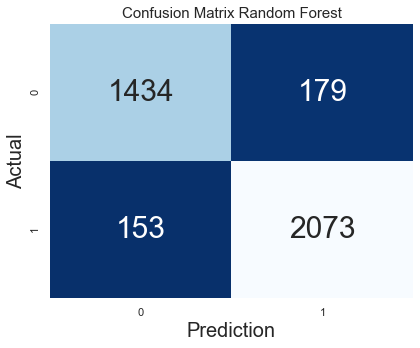

In [43]:
plt.figure(figsize = (6, 5))
sns.heatmap(
        confusion_matrix(y_test, y_test_pred),
        annot = True,
        fmt = '.0f',
        cmap = 'Blues_r', cbar=False,
        annot_kws={"fontsize":30}
    )
plt.xlabel("Prediction", fontsize = 20)
plt.ylabel("Actual", fontsize = 20)
plt.title("Confusion Matrix Random Forest", fontsize = 15)

plt.tight_layout()
plt.show()

# Model Inference

In [44]:
pred_result = []

model_pred = grid.predict(X_test)
pred_result.append(model_pred)

In [45]:
#insert predict result to dataframe
pred_result_log = pd.DataFrame({
    "Actual Target":y_test,
    "Prediction with RF":pred_result[0]
})
pred_result_log.head()

,Actual Target,Prediction with RF
8703,1,1
22614,1,1
2777,0,1
17547,1,1
24621,1,1


In [46]:
cek_data = np.array([800, 1, 0, 1, 0, 0, 0, 1]).reshape(1, -1)
print('Predict with RF: ', grid.predict(cek_data))

Predict with RF:  [0]


# Conclusion
### Insights from EDA

1. Persentase kemenangan tim biru dan merah di dataset ini seimbang 50:50 dengan rata-rata lama permainan sekitar 24 menit. Pada projek ini, penulis hanya akan berfokus pada kemenangan tim biru saja.

2. Berdasarkan dataset ini, faktor kemenangan tim biru didapat dari seberapa cepat tim biru dapat mengambil *first tower* dan *first inhibitor*, serta banyaknya tower dan inhibitor yang dihancurkan. Dengan mendapatkan firstTower musuh, diharapkan pergerakan tim dapat lebih leluasa sehingga dapat fokus ke objective selanjutnya.

3. Selain variabel yang telah disebutkan sebelumnya, variabel *Dragonkills* juga cukup berpengaruh dan variabel ini lebih tinggi korelasinya dibangdingkan *Baronkills*. Sehingga dari segi permainan, menjaga area dragon lebih diuntungkan daripada area Baron dan dapat menjadi priotitas tim agar tidak dikuasai musuh selama permainan berlangsung.

4. Penggunaan dan penempatan ward (warding for better vision on enemy) *surprisingly* tidak terlalu berpengaruh di sini. 

5. FirstBaronKill juga menjadi salah satu faktor kemenangan suatu tim. Dikarenakan setelah membunuh Baron, seluruh tim mendapatkan exp dan gold tambahan serta buff untuk player dan minions sekitar. Hal ini sangat berguna untuk pushing lane.

6. Sebagian besar data terdistribusi normal, walaupun ada beberapa data yang skewed yang menunjukkan adanya outlier (dibuktikan dengan boxplot). Hal ini wajar terjadi dikarenakan ada beberapa match permainan yang berlangsung lebih lama dari biasanya sehingga nilai variabel lainnya ikut meningkat seiring waktu match tersebut.



### Model Analysis
*Most suitable model for the dataset:* **Random Forest**

Penulis memilih dua model untuk dataset ini, Random Forest dan Logistic Regression. Alasannya adalah karena RF memiliki akurasi yang cukup tinggi dan LR memiliki kecepatan yang cukup tinggi dan interpretable. Untuk pemilihan model terbaik menggunakan pipeline dan gridsearchCV (Untuk hyperparameter tuning) dan **Random Forest** lebih unggul dari Logistic Regression, dengan skor:

| Accuracy | f1 Score | ROC_AUC |
| :-: | :-: | :-: |
| 0.91 | 0.92 | 0.91

Sementara Confusion Matrix yang didapatkan:

| True Negative | False Positive | False Negative | True Positive
| :-: | :-: | :-: | :-: |
| 1434 | 179 | 153 | 2073 |

<br>
<br>
Selain skor akurasi yang diperhatikan di sini, kita juga memperhatikan nilai dari confusion matrix. Nilai yang diperhatikan di sini adalah F1 Score nya, atau keseimbangan antara precision dan recall (false negative dan false positive). Karena model ini diharapkan dapat memprediksi dengan tepat dan akurat, sehingga tim dapat membuat strategi yang tepat mengenai objective apa yang diutamakan pada setiap match dan batasan waktu objective tersebut harus dicapai.

Memang, akan sulit bahkan tidak mungkin mendapatkan False Negative(FN) dan False Positive(FP) yang sangat rendah sekali bahkan 0. Maka lebih baik diminimalisir dengan memilih model yang memiliki FN dan FP terendah dari model lainnya.

In [49]:
import pickle
pickle.dump(grid, open("best_model_rf.pkl", "wb"))